# Liste des modules

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
train_datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip= False)

test_datagen = ImageDataGenerator()

In [3]:
path="/media/jhy/46AE-6494/DB/img/food/fruits_base/"

directory = path + 'Train'
Train = train_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
)

directory = path + 'Test'
Test = test_datagen.flow_from_directory(
    directory= directory,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
)

Found 33709 images belonging to 67 classes.
Found 11302 images belonging to 67 classes.


In [4]:
 label_map = (Train.class_indices)

In [5]:
print(label_map)

{'Apple': 0, 'Apricot': 1, 'Avocado': 2, 'Banana': 3, 'Beetroot': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Carambula': 8, 'Cauliflower': 9, 'Cherry': 10, 'Chestnut': 11, 'Clementine': 12, 'Cocos': 13, 'Corn': 14, 'Cucumber Ripe': 15, 'Dates': 16, 'Eggplant': 17, 'Fig': 18, 'Ginger Root': 19, 'Granadilla': 20, 'Grape Blue': 21, 'Guava': 22, 'Hazelnut': 23, 'Huckleberry': 24, 'Kaki': 25, 'Kiwi': 26, 'Kohlrabi': 27, 'Kumquats': 28, 'Lemon': 29, 'Limes': 30, 'Lychee': 31, 'Mandarine': 32, 'Mango': 33, 'Mangostan': 34, 'Maracuja': 35, 'Melon Piel de Sapo': 36, 'Mulberry': 37, 'Nectarine': 38, 'Nut Forest': 39, 'Nut Pecan': 40, 'Onion Red': 41, 'Orange': 42, 'Papaya': 43, 'Passion Fruit': 44, 'Peach': 45, 'Pear': 46, 'Pepino': 47, 'Pepper Green': 48, 'Physalis': 49, 'Pineapple': 50, 'Pitahaya Red': 51, 'Plum': 52, 'Pomegranate': 53, 'Pomelo Sweetie': 54, 'Potato Red': 55, 'Quince': 56, 'Rambutan': 57, 'Raspberry': 58, 'Redcurrant': 59, 'Salak': 60, 'Strawberry': 61, 'Tamarillo

In [6]:
 model = Sequential([
          Conv2D(2, kernel_size=3, activation='relu', input_shape=(100,100, 3))
        , Conv2D(10, kernel_size=3, activation='relu', input_shape=(100,100, 3))
        , MaxPooling2D()
        , Flatten()
        , Dense(len(label_map) , activation = "softmax")
        ])

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 2)         56        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 10)        190       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23040)             0         
_________________________________________________________________
dense (Dense)                (None, 67)                1543747   
Total params: 1,543,993
Trainable params: 1,543,993
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    Train,
    validation_data=Test,
    epochs = 20)

Epoch 1/20
1054/1054 [==============================] - 137s 129ms/step - loss: 4.5398 - accuracy: 0.0664 - val_loss: 3.5983 - val_accuracy: 0.2279
Epoch 2/20
1054/1054 [==============================] - 140s 133ms/step - loss: 3.3900 - accuracy: 0.1978 - val_loss: 2.9983 - val_accuracy: 0.3097
Epoch 3/20
1054/1054 [==============================] - 137s 130ms/step - loss: 2.9438 - accuracy: 0.2822 - val_loss: 3.2762 - val_accuracy: 0.3512
Epoch 4/20
1054/1054 [==============================] - 142s 135ms/step - loss: 2.5834 - accuracy: 0.3563 - val_loss: 2.4531 - val_accuracy: 0.4478
Epoch 5/20
1054/1054 [==============================] - 141s 134ms/step - loss: 2.1329 - accuracy: 0.4640 - val_loss: 2.4753 - val_accuracy: 0.4958
Epoch 6/20
1054/1054 [==============================] - 141s 134ms/step - loss: 1.7240 - accuracy: 0.5560 - val_loss: 1.6694 - val_accuracy: 0.6071
Epoch 7/20
1054/1054 [==============================] - 140s 133ms/step - loss: 1.3581 - accuracy: 0.6366 - val_

In [9]:
history.history['val_accuracy']

[0.22792425751686096,
 0.30967971682548523,
 0.35117676854133606,
 0.44779685139656067,
 0.49584144353866577,
 0.6071491837501526,
 0.6452839970588684,
 0.635462760925293,
 0.6842151880264282,
 0.7819854617118835,
 0.7266855239868164,
 0.7778269052505493,
 0.7900371551513672,
 0.7758803963661194,
 0.7847283482551575,
 0.8206512331962585,
 0.8388780951499939,
 0.807113766670227,
 0.8242788910865784,
 0.8827641010284424]

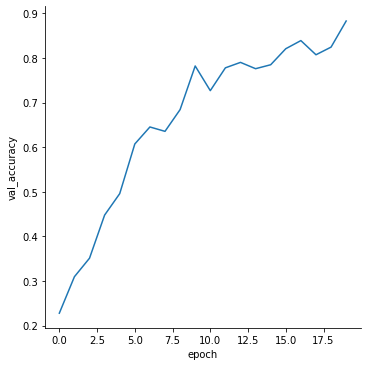

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
X = []
y = history.history['val_accuracy']
y2 = history.history['val_loss']
for x in range(len(y)):
    X.append(x)
ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_accuracy")
plt.show()


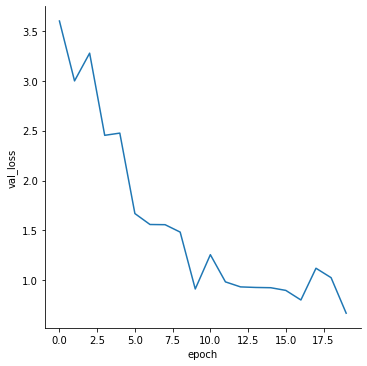

In [11]:
X = []
y = history.history['val_loss']
for x in range(len(y)):
    X.append(x)


ax = sns.relplot(x=X, y=y, kind="line")
ax.set(xlabel = "epoch", ylabel = "val_loss")
plt.show()

## TEST

In [12]:
def prediction (img_path,size = (100,100)):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    
    img = image.load_img(img_path, target_size=size, color_mode = "rgb")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    result = model.predict(x)
    y_classes = result.argmax(axis=-1)
    
    return y_classes

In [13]:
from IPython.display import Image

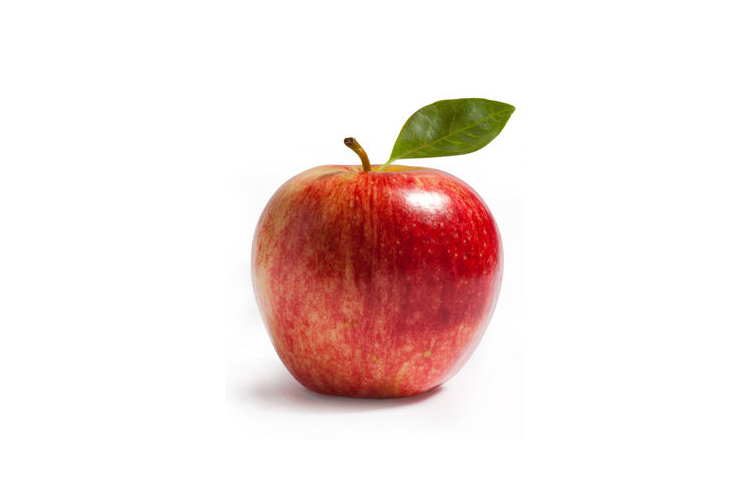

In [14]:
img_path="/media/jhy/46AE-6494/DB/img/food/Pomme/1.jpeg"
Image(filename=img_path)


In [15]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)


Passion Fruit


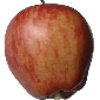

In [16]:
img_path="/media/jhy/46AE-6494/DB/img/food/fruits-360/Test-light/Apple Red 1/6_100.jpg"
Image(filename=img_path)

In [17]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Apple


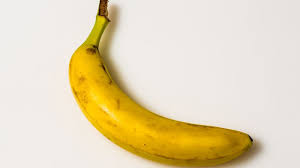

In [18]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/01.jpeg"
Image(filename=img_path)

In [19]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Carambula


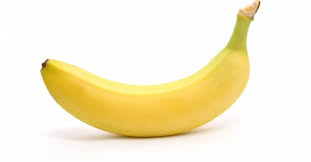

In [20]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/02.jpeg"
Image(filename=img_path)

In [21]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Watermelon


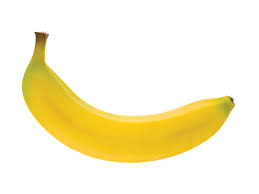

In [22]:
img_path="/media/jhy/46AE-6494/DB/img/food/Banane/03.jpeg"
Image(filename=img_path)


In [23]:
for keys, values in label_map.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if values == prediction(img_path):
        print(keys)

Quince


In [38]:
model.save('models/modele-prototype-131-Valpha')

INFO:tensorflow:Assets written to: models/modele-prototype-131-V3-heavy-goodpredict/assets


In [56]:
import pickle 

a_file = open("models/modele-prototype-131.pkl", "wb")

pickle.dump(label_map, a_file)

a_file.close()